## Exploratory Text Analysis

### 1. Reading the data and some cleaning

In [1]:
#Importing packages
import os
import glob
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import style
style.use('ggplot')

In [2]:
# Change the dirctory for file to be read
os.chdir(r"C:\Users\Sultan\Desktop\data\PreprocessedData") 

In [3]:
# Read the data file
df = pd.read_csv(r'CombinedData.csv', engine='python')

# Take a look at the dataframe 
df.head()

,ï»¿word,organization,year
0,fiscal,Guilford County,FY2013
1,year,Guilford County,FY2013
2,adopted,Guilford County,FY2013
3,budget,Guilford County,FY2013
4,brenda,Guilford County,FY2013


In [4]:
# Rename col 0
df.columns = ['word','organization','year']
df.head()

,word,organization,year
0,fiscal,Guilford County,FY2013
1,year,Guilford County,FY2013
2,adopted,Guilford County,FY2013
3,budget,Guilford County,FY2013
4,brenda,Guilford County,FY2013


In [5]:
# Lets discribe the dataframe again
df.word.describe()

count     3184264
unique      34155
top        county
freq        45070
Name: word, dtype: object

### 2. Most common words

Counting the frequency of words using python native Counter, <br/>
which has a most_common(n) function returning the top n
elements in the list.

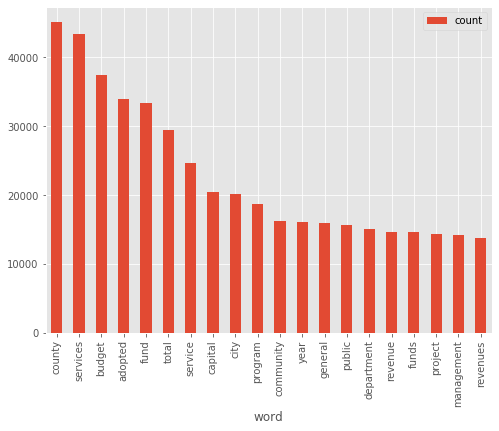

In [6]:
from collections import Counter 

counter = Counter(df.word)

# Top 20 words in the documents from 2013-2020
counter.most_common(20)

# Visualizing the top words
freq_df = pd.DataFrame.from_records(counter.most_common(20),
                              columns=['word', 'count'])

# Create bar plot
freq_df.plot(figsize=(8, 6), kind='bar', x='word')

### 3. number of words visualized

#### Year wise 

In [7]:
# Checking the group keys for year col
df.groupby(['year']).groups.keys()

dict_keys(['FY2013', 'FY2014', 'FY2015', 'FY2016', 'FY2017', 'FY2018', 'FY2019', 'FY2020'])

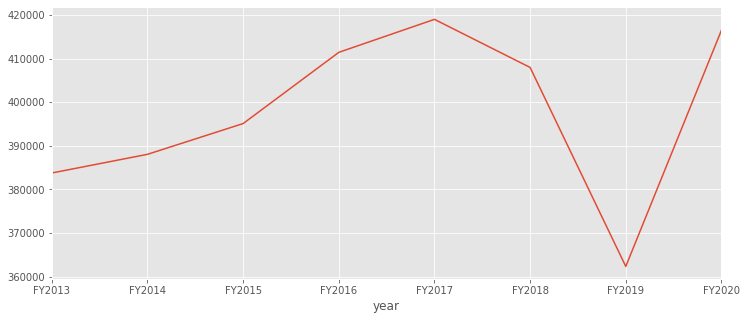

In [8]:
# Plot count of text data grouped by year 
fig, ax = plt.subplots(figsize=(12,5))
df.groupby(['year']).count()['word'].plot(ax=ax)

In [9]:
# Lets verify what we just saw
# find the length of the data grouped by year and key ['FY2019']
len(df.groupby(['year']).groups['FY2019'])

362319

#### Now let's compare them organization wise

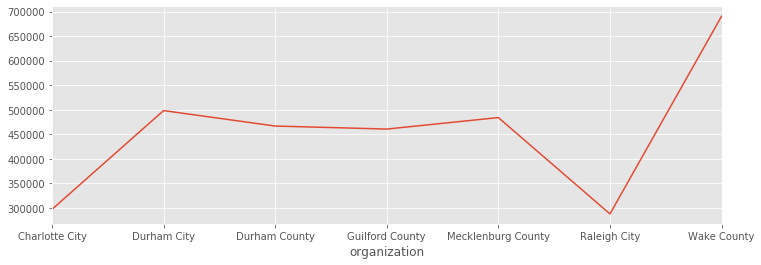

In [10]:
# Plot count of text data grouped by organization
fig, ax = plt.subplots(figsize=(12,4))
df.groupby(['organization']).count()['word'].plot(ax=ax)

### 4. Exploring the data from 2020

In [11]:
# Now let's select the data entries from columns 'word' and 'organization' that 
# has the label FY2020 and store it in a different dataframe
FY20_df = df.loc[df['year'] == 'FY2020', ['word', 'organization', 'year']]
FY20_df.head()

,word,organization,year
2767745,guilford,Guilford County,FY2020
2767746,county,Guilford County,FY2020
2767747,numbers,Guilford County,FY2020
2767748,makes,Guilford County,FY2020
2767749,count,Guilford County,FY2020


In [12]:
# Use loc to slice and extract 2020 data 
gc_df      = FY20_df.loc[FY20_df['organization'] == 'Guilford County', ['word', 'organization']]
cc_df      = FY20_df.loc[FY20_df['organization'] == 'Charlotte City', ['word', 'organization']]
dcity_df   = FY20_df.loc[FY20_df['organization'] == 'Durham City', ['word', 'organization']]
dcounty_df = FY20_df.loc[FY20_df['organization'] == 'Durham County', ['word', 'organization']]
mc_df      = FY20_df.loc[FY20_df['organization'] == 'Mecklenburg County', ['word', 'organization']]
rc_df      = FY20_df.loc[FY20_df['organization'] == 'Raleigh City', ['word', 'organization']]
wc_df      = FY20_df.loc[FY20_df['organization'] == 'Wake County', ['word', 'organization']]

In [13]:
# Create series out of the word col 
corpus  = gc_df.word
corpus1 = cc_df.word
corpus2 = dcity_df.word
corpus3 = dcounty_df.word
corpus4 = mc_df.word
corpus5 = rc_df.word
corpus6 = wc_df.word

In [14]:
# For each text, join the elements and sperate them by a single space
gc_text      = ' '.join(word for word in corpus)
cc_text      = ' '.join(word for word in corpus1)
dcity_text   = ' '.join(word for word in corpus2)
dcounty_text = ' '.join(word for word in corpus3)
mc_text      = ' '.join(word for word in corpus4)
rc_text      = ' '.join(word for word in corpus5)
wc_text      = ' '.join(word for word in corpus6)

In [15]:
# Now let's make a list of lists with each org. having its corresponding text. 
data = [['Guilford County', gc_text], ['Charlotte City', cc_text], ['Durham City', dcity_text], 
        ['Durham County', dcounty_text], ['Mecklenburg County', mc_text],
        ['Raleigh City', rc_text],['Wake County', wc_text]] 

In [16]:
# One more step, let's create a data frame from the list of lists we have
df = pd.DataFrame(data, columns = ['organization', 'content'])
df

,organization,content
0,Guilford County,guilford county numbers makes count county sta...
1,Charlotte City,ensuring equitable sustainable resilient charl...
2,Durham City,fiscal year adopted budget july june city durh...
3,Durham County,approved budget durham county north carolina a...
4,Mecklenburg County,meckncgov fiscal year adopted budget mecklenbu...
5,Raleigh City,adopted budget strengthening foundation workfo...
6,Wake County,adopted operating budget capital improvement p...


In [17]:
# Count the number of words per document
df['num_wds'] = df['content'].apply(lambda x: len(x.split()))
df

,organization,content,num_wds
0,Guilford County,guilford county numbers makes count county sta...,62061
1,Charlotte City,ensuring equitable sustainable resilient charl...,57569
2,Durham City,fiscal year adopted budget july june city durh...,52919
3,Durham County,approved budget durham county north carolina a...,61340
4,Mecklenburg County,meckncgov fiscal year adopted budget mecklenbu...,54658
5,Raleigh City,adopted budget strengthening foundation workfo...,46635
6,Wake County,adopted operating budget capital improvement p...,81337


In [18]:
df['num_wds'].max()

81337

In [19]:
df['num_wds'].mean()

59502.71428571428

In [20]:
df['num_wds'].min()

46635

#### Visualize the word count per document

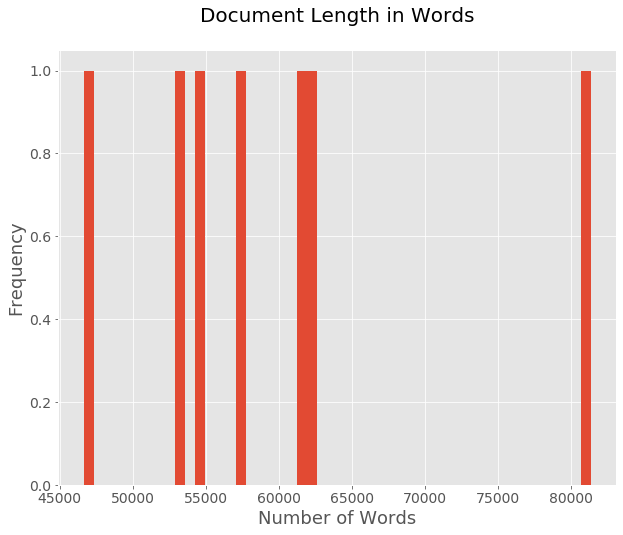

In [21]:
ax=df['num_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(10,8))
ax.set_title('Document Length in Words\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Words', fontsize=18);

#### Find the count of unique words per documents

In [22]:
df['uniq_wds'] = df['content'].str.split().apply(lambda x: len(set(x)))
df['uniq_wds']

0    6110
1    5315
2    6027
3    6498
4    4781
5    5185
6    6651
Name: uniq_wds, dtype: int64

#### Min, Mean, Max of unique words

In [23]:
df['uniq_wds'].min()

4781

In [24]:
df['uniq_wds'].mean()

5795.285714285715

In [25]:
df['uniq_wds'].max()

6651

#### Visualize the number of unique words per document

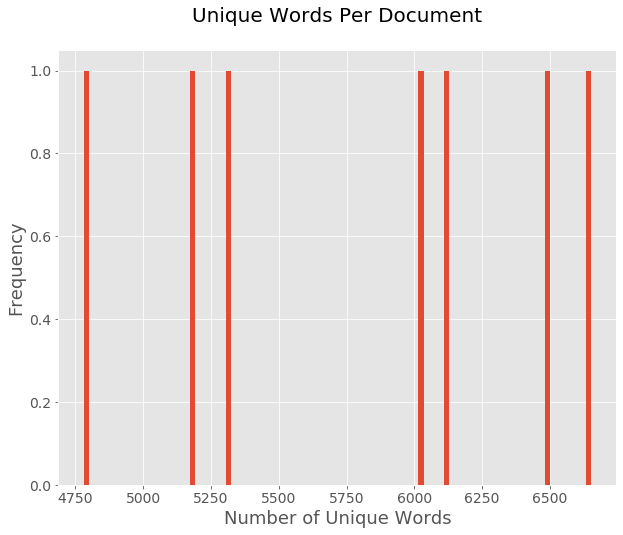

In [27]:
ax=df['uniq_wds'].plot(kind='hist', bins=50, fontsize=14, figsize=(10,8))
ax.set_title('Unique Words Per Document\n', fontsize=20)
ax.set_ylabel('Frequency', fontsize=18)
ax.set_xlabel('Number of Unique Words', fontsize=18);